In [1]:
# 3 Tile Puzzle 
import heapq as hq # Heap used to represent priority queue
import copy
from time import perf_counter

# uniform cost search distance implementation for puzzld
def calc_uniform_dist(state, goal):
    all_dist = [] 
    # starts loop from 0 lenth of the initial state
    for i in range(0, len(state)):
        for j in range(0, len(state[i])):
            if (state[i][j] == goal[i][j]): # to check state and goal  
                continue
                
            if (state[i][j] == 0):
                continue
            
            else:
                # find where this tile is in the goal state
                i_of_goal_tile, j_of_goal_tile = find_in_sublists(state[i][j], goal)
                # distance formula 
                distance = pow(pow((i - i_of_goal_tile), 2) + pow(j - j_of_goal_tile, 2), 0.5)
                all_dist.append(distance) # add values one by one in list
    # return the sum of all added values in a list
    return sum(all_dist) 

# A* with the total manhattan search distance implementation

def calc_manhattan_dist(state, goal):
    all_dist = []

    for i in range(0, len(state)):
        for j in range(0, len(state[i])):
            if (state[i][j] == goal[i][j]):
                continue
                
            if (state[i][j] == 0):
                continue
            
            else:
                # find where this tile is in the goal state
                i_of_goal_tile, j_of_goal_tile = find_in_sublists(state[i][j], goal)
                
                distance = abs(i - i_of_goal_tile) + abs(j - j_of_goal_tile)
                all_dist.append(distance)
    
    return sum(all_dist)

# A* with the misplaced tiles heuristic implementation
def calc_misplaced_tiles(state, goal):
    """Calculate the number of misplaced tiles. 0 is ignored in this calculation."""
    # Flatten the list of lists for easy comparison
    state = [item for sublist in state for item in sublist]
    goal = [item for sublist in goal for item in sublist]
    
    count = 0
    # loop for finding the goal state of the puzzle
    for i in range(0, len(goal)):
        if state[i] == 0:
            continue
        if (state[i] != goal[i]):
            count += 1
            
    return count

# function for checking the states equality 
def check_states_equal(state_a, state_b):
    """
    Check if two states are equal.
    
    Returns:
    true/false if states are the same/diff.
    
    Referenced:
    https://stackoverflow.com/a/952952/5607713
    """
    # Flatten the list of lists for easy comparison
    flat_list_a = [item for sublist in state_a for item in sublist]
    flat_list_b = [item for sublist in state_b for item in sublist]
    
    return flat_list_a == flat_list_b

# function for finding the value in sublist 
def find_in_sublists(val, lst):
    """
    Helper function used in Node.expand. Find value in list of lists.
    
    Referenced:
    https://stackoverflow.com/a/9553668/5607713
    
    Returns:
    A tuple containing the indices of val in lst.
    """
    for i, sub_list in enumerate(lst):
        try:
            j = sub_list.index(val)
        except ValueError:
            continue
        return i, j
            
    return None, None

# TODO decorate with @total_ordering
# https://docs.python.org/2/library/functools.html#functools.total_ordering
class Node:
    def __init__(self, parent=None, state=0, cost_from_start=0, cost_to_goal=0):
        self.parent = parent
        self.state = state
        self.cost_from_start = cost_from_start
        self.cost_to_goal = cost_to_goal # number of cost from state to goal
        self.children = []
        
    # https://stackoverflow.com/a/25316839/5607713
    
    # This is how we compare the states of two nodes in heapq and the explored list
    def __eq__(self, other):
        return self.state == other.state
    
    def __lt__(self, other):
        """This will automatically calculate the f-val = g(n) + h(n) when this node is put in a heapq"""
        return (self.cost_from_start + self.cost_to_goal) < (other.cost_from_start + other.cost_to_goal)

    def add_child(self, node, cost_to_expand=1):
        """Adds a child node to the list of this node's children"""
        node.cost_from_start = self.cost_from_start + cost_to_expand # extend the child'd cost from start
        node.parent = self # set parent
        self.children.append(node)
        
    def get_f_val(self):
        """Returns cost from start + cost to goal"""
        return (self.cost_from_start + self.cost_to_goal)
    
    def traceback(self):
        """Traverse all parents and print their states and traversed count"""
        print(self.state)
        
        p = self.parent
        count = 1
        
        while p:
            count += 1
            print(p.state)
            p = p.parent
            
        print(str(count) + " nodes traced.\n")
    # function for printing the state one by one    
    def print_state(self):
        for i in self.state:
            print(i)
        
    def expand(self):
        """Returns a list of valid expanded states."""
        # find index of 0
        i_zero, j_zero = find_in_sublists(0, self.state)
        state_len = len(self.state)
        
        states_to_return = []
        
        # Move Up: Swap zero and the element above it such element exists
        if (i_zero != 0):
            tmp_state = copy.deepcopy(self.state)
            tmp_state[i_zero][j_zero] = tmp_state[i_zero - 1][j_zero]
            tmp_state[i_zero - 1][j_zero] = 0
            
            # Only add if the parent does not have the same expanded state
            if self.parent and check_states_equal(tmp_state, self.parent.state):
                states_to_return.append(None) 
            else:
                states_to_return.append(tmp_state)
        
        # Move Right: Swap zero and the element on its right if possible
        if (j_zero != (state_len - 1)):
            tmp_state = copy.deepcopy(self.state)
            tmp_state[i_zero][j_zero] = tmp_state[i_zero][j_zero + 1]
            tmp_state[i_zero][j_zero + 1] = 0
            
            # Only add if the parent does not have the same expanded state
            if self.parent and check_states_equal(tmp_state, self.parent.state):
                states_to_return.append(None) 
            else:
                states_to_return.append(tmp_state)
                
        # Move Down: Swap zero and the element below it if possible
        if (i_zero != (state_len - 1)):
            tmp_state = copy.deepcopy(self.state)
            tmp_state[i_zero][j_zero] = tmp_state[i_zero + 1][j_zero]
            tmp_state[i_zero + 1][j_zero] = 0
            
            # Only add if the parent does not have the same expanded state
            if self.parent and check_states_equal(tmp_state, self.parent.state):
                states_to_return.append(None) 
            else:
                states_to_return.append(tmp_state)
        
        # Move Left: Swap zero and the element on its left if possible
        if (j_zero != 0):
            tmp_state = copy.deepcopy(self.state)
            tmp_state[i_zero][j_zero] = tmp_state[i_zero][j_zero - 1]
            tmp_state[i_zero][j_zero - 1] = 0
            
            # Only add if the parent does not have the same expanded state
            if self.parent and check_states_equal(tmp_state, self.parent.state):
                states_to_return.append(None)
            else:
                states_to_return.append(tmp_state)
               
        # ADD MORE LEGAL MOVES HERE
        return states_to_return

# search alogithm tree search function to search for initial-state and goal-state
def tree_search(start_state, goal_state, heuristic, verbose="y"):
    root = Node(state=start_state)
    h = [] # Used as a heapq
    hq.heappush(h, root)
    explored = []
    
    max_nodes = 1
    expanded = 0
    
    # While heapq is not empty...
    while h:
        max_nodes = max(len(h), max_nodes)
        
        current = hq.heappop(h)
        
        if (verbose == "y"):
            print("\nThe best state to expand with g(n) = "
                  + str(int(current.cost_from_start))
                  + " and h(n) = " 
                  + str(int(current.cost_to_goal))
                  + " is...")
            current.print_state()
        
        if (check_states_equal(current.state, goal_state)):
            if (verbose == "y"):
                print("\nFound a solution!")
                print("Traceback:")
                current.traceback()
                print("To solve this problem the search algorithm expanded a total of " + str(expanded) + " nodes.") 
                print("The maximum number of nodes in the queue at any one time: " + str(max_nodes))
            
            return expanded, max_nodes
        
        else:
            explored.append(current)
            
            # Filter out None states
            expanded_states_list = [non_none_state for non_none_state in current.expand() if non_none_state]
            
            # If expanded_states_list is empty after we filter all None, continue
            if expanded_states_list == []:
                continue
        
            for expanded_state in expanded_states_list:
                new_node = Node(state=expanded_state)

                # If h is not empty and new_node already exists in h, continue
                # If explored is not empty and new_node already exists in explored, continue
                if ((h and new_node in h) or (explored and new_node in explored)):
                    # already seen
                    continue

                # Depending on the heuristic, calculate costs
                if (heuristic == "uniform"):
                    new_node.cost_to_goal = calc_misplaced_tiles(new_node.state, goal_state)

                if (heuristic == "a_star_euclidean"):
                    new_node.cost_to_goal = calc_uniform_dist(new_node.state, goal_state)

                if (heuristic == "a_star_manhattan"):
                    new_node.cost_to_goal = calc_manhattan_dist(new_node.state, goal_state)


                current.add_child(node=new_node)

                # Referenced https://docs.python.org/3/library/heapq.html#priority-queue-implementation-notes
                # NOTE: F-VAL = (g(n) + h(n)) IS AUTOMATICALLY CALCULATED WHEN HEAPQ SORTS NODES
                # SEE def __lt__(self, other) IN THE NODE CLASS
                hq.heappush(h, new_node)
        
            expanded += 1
        
    print("Couldn't find a solution :(")            
    return -1

# a function that take input from user to select the defined algorithms 
def get_algorithm():
    print("Select algorithm:\n"
          + " 1  Uniform Cost Search" + "\n"
          + " 2  A* Misplaced Tile Heuristic" + "\n"
          + " 3  A* Manhattan Distance Heuristic" + "\n")
    
    alg_input_dict = {
                "1": ("uniform", "Uniform Cost Search"),
                "2": ("a_star_misplaced", "A* Misplaced Tile Heuristic"),
                "3": ("a_star_manhattan", "A* Manhattan Distance Heuristic"),
            }
    
    while True:
        try:
            selection = input() or str(len(alg_input_dict))
            
            if (int(selection) < 1) or (int(selection) > len(alg_input_dict)):
                print("Error: input " + selection + " is not within range.\n")
                raise ValueError
            
            break
        except(ValueError):
            print("Error: please input a number in the valid range or press enter for default!")
        
    print("Selected " + alg_input_dict[selection][1])
    
    return alg_input_dict[selection][0]

# function for default puzzle  
def init_default_puzzle():
    """
    Gets user input and returns the corresponding puzzle matrix.
    
    Parameters:
    puzzle_list (list of pairs): list containing pairs of ["name", list of lists]
        E.g, puzzle_list = [("trivial", [[1, 2, 3], [4, 5, 6], [7, 8, 0]])]
    
    Returns:
    list of lists: represents a matrix.
    """
    
    puzzle_list = [
        ("demo", [[1, 0, 3], [4, 2, 6], [7, 5, 8]]),
        ("trivial", [[1, 2, 3], [4, 5, 6], [7, 8, 0]]),
        ("very easy", [[1, 2, 3], [4, 5, 6], [7, 0, 8]]),
        ("easy", [[1, 2, 0], [4, 5, 3], [7, 8, 6]]),
        ("doable", [[0, 1, 2], [4, 5, 3], [7, 8, 6]]),
        ("oh boy", [[8, 7, 1], [6, 0, 2], [5, 4, 3]]),
        ("impossible", [[1, 2, 3], [4, 5, 6], [8, 7, 0]]),
        # insert new puzzle here
    ]
    
    list_len = len(puzzle_list)

    print("Default puzzle: enter the difficulty (1 to " + str(list_len) + "):\n")
    
    # Show the user different puzzle difficulties
    print("[1] " + puzzle_list[0][0])
    for i in range(1, len(puzzle_list)):
        print(" " + str(i + 1) + "  " + puzzle_list[i][0])
    
    while True:
        try:
            selected_difficulty = int(input() or 1)

            if ((selected_difficulty < 1) or (selected_difficulty > list_len)):
                print("Error: input " + str(selected_difficulty) + " is not within range.\n")
                raise ValueError

            break
        except(ValueError):
            print("Error: please input a number or press enter for default!")

    # e.g, Selecting trivial returns [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
    print("Selected " + puzzle_list[selected_difficulty - 1][0] + "\n")
    return puzzle_list[selected_difficulty - 1][1]

# function to enter the number of rows from user
def get_goal_state(num_rows):
    """
    1. Get user input for how many rows and cols the square matrix should have.
    2. Get user input whether they want to use the default goal state. For example,
    for a 3 by 3 puzzle, you get:
       [[1, 2, 3]
        [4, 5, 6]
        [7, 8, 0]]
    3. If user inputs 'n', get custom initial state.
    """
    
    # ref https://stackoverflow.com/a/55646828/5607713
    # Generate a generic goal state
    # Create and populate a new goal state
    goal_state = [[(j + 1) + (num_rows * i) for j in range(num_rows)] for i in range(num_rows)]
    goal_state[num_rows - 1][num_rows - 1] = 0

    print("Use default goal state? [y]/n")
    
    # Show the user what the default goal looks like
    for i in goal_state:
        print(i)

    goal_mode = input() or "y"

    if goal_mode != "y":
        print("Enter custom goal state, using 0 to represent the blank."
              + " Delimit the numbers with a space. Press enter when done.\n")

        goal_state = []

        # Get custom goal state
        for i in range(0, num_rows):
            row = input("Enter row number " + str(i + 1) + ": ")
            # List comprehension: cast every item to int
            row = [int(x) for x in row.split()] # https://www.geeksforgeeks.org/python-converting-all-strings-in-list-to-integers/
            goal_state.append(row)
        
        # Check for existence of 0
        if find_in_sublists(0, goal_state)[0] == None:
            print("No 0 found. Exiting...")
            return None
        
    return goal_state

#function for enterting the initial state of puzzle
def get_initial_state(num_rows):
    print("Enter your initial puzzle, using 0 to represent the blank."
              + " Delimit the numbers with a space. Press enter when done.\n")
        
    matrix = []

    # Get custom start state
    for i in range(0, num_rows):
        row = input("Enter row number " + str(i + 1) + ": ")
        # List comprehension: cast every item to int
        row = [int(x) for x in row.split()]
        matrix.append(row)

    # Check for existence of 0
    if find_in_sublists(0, matrix)[0] == None:
        print("No 0 found. Exiting...")
        return None
        
    return matrix

# main fucntion of the program
def main():
    print("Welcome to 8-puzzle solver.")
    print("Select an option:\n")
    print("[1] Default 3x3 puzzle" + "\n"
        + " 2  Custom puzzle" + "\n"
        + "(Press enter to default to [1])"
         )
    
    init_state = []
    goal_state = []
    
    while True:
        mode = input() or "1"

        if mode == "1":
            init_state = init_default_puzzle()
            goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
            
            break
            
        if mode == "2":
            print("Enter the number of rows and columns to make a square puzzle:")
            
            while True:
                try:
                    num_rows = int(input())
                    
                    if num_rows < 0:
                        raise ValueError
                    
                    break
                except ValueError:
                    print("Error: input a positive number")

            init_state = get_initial_state(num_rows)
            if init_state == None:
                return

            goal_state = get_goal_state(num_rows)
            if goal_state == None:
                return
            
            break
        else:
            print("Please input 1, 2, or press enter for default.")
        
        
    verbose = input("Display state traceback at the end? (may crash your notebook if puzzle is too difficult)"
                        + " [y]/n" + "\n") or "y"
    
    alg = get_algorithm()
    
# UNCOMMENT AND RUN TO MEASURE PERFORMANCE
#     lst = []
#     expanded = []
#     max_q = []
    
      # average over 10 iterations
#     for i in range(0, 10):
#         t1_start = perf_counter()

#         # Init alg
#         xpanded, m = tree_search(init_state, goal_state, alg, verbose)

#         t1_stop = perf_counter()
#         millisec = (t1_stop - t1_start)
#         lst.append(millisec)
#         expanded.append(xpanded)
#         max_q.append(m)
    
#     avg1 = (sum(lst) / len(lst)) * 1000
#     avg2 = sum(expanded) / len(expanded)
#     avg3 = sum(max_q) / len(max_q)
#     print("--- %s avg milliseconds for 10 iterations ---" % avg1)
#     print("--- %s avg expanded for 10 iterations ---" % avg2)
#     print("--- %s avg max q for 10 iterations ---" % avg3)
    
    
    # COMMENT THESE OUT WHEN YOU UNCOMMENT THE STUFF ABOVE
    t1_start = perf_counter()
    # Init alg
    tree_search(init_state, goal_state, alg, verbose)
    
    t1_stop = perf_counter()
    ms = (t1_stop - t1_start)
    print("--- %s milliseconds ---" % ms)
        
    return


In [2]:
main()

Welcome to 8-puzzle solver.
Select an option:

[1] Default 3x3 puzzle
 2  Custom puzzle
(Press enter to default to [1])
1
Default puzzle: enter the difficulty (1 to 7):

[1] demo
 2  trivial
 3  very easy
 4  easy
 5  doable
 6  oh boy
 7  impossible
6
Selected oh boy

Display state traceback at the end? (may crash your notebook if puzzle is too difficult) [y]/n
y
Select algorithm:
 1  Uniform Cost Search
 2  A* Misplaced Tile Heuristic
 3  A* Manhattan Distance Heuristic

3
Selected A* Manhattan Distance Heuristic

The best state to expand with g(n) = 0 and h(n) = 0 is...
[8, 7, 1]
[6, 0, 2]
[5, 4, 3]

The best state to expand with g(n) = 1 and h(n) = 17 is...
[8, 0, 1]
[6, 7, 2]
[5, 4, 3]

The best state to expand with g(n) = 1 and h(n) = 17 is...
[8, 7, 1]
[6, 4, 2]
[5, 0, 3]

The best state to expand with g(n) = 1 and h(n) = 17 is...
[8, 7, 1]
[0, 6, 2]
[5, 4, 3]

The best state to expand with g(n) = 2 and h(n) = 16 is...
[0, 8, 1]
[6, 7, 2]
[5, 4, 3]

The best state to expand with

[7, 8, 0]

The best state to expand with g(n) = 13 and h(n) = 9 is...
[1, 6, 2]
[5, 8, 3]
[7, 0, 4]

The best state to expand with g(n) = 14 and h(n) = 8 is...
[7, 1, 2]
[4, 8, 3]
[0, 5, 6]

The best state to expand with g(n) = 17 and h(n) = 5 is...
[1, 0, 3]
[5, 2, 6]
[7, 8, 4]

The best state to expand with g(n) = 10 and h(n) = 12 is...
[7, 5, 1]
[4, 8, 2]
[0, 6, 3]

The best state to expand with g(n) = 16 and h(n) = 6 is...
[1, 5, 2]
[7, 6, 3]
[4, 8, 0]

The best state to expand with g(n) = 14 and h(n) = 8 is...
[1, 6, 2]
[5, 8, 3]
[7, 4, 0]

The best state to expand with g(n) = 15 and h(n) = 7 is...
[1, 2, 3]
[0, 7, 6]
[8, 5, 4]

The best state to expand with g(n) = 7 and h(n) = 15 is...
[8, 1, 2]
[0, 7, 3]
[6, 5, 4]

The best state to expand with g(n) = 3 and h(n) = 19 is...
[8, 7, 1]
[6, 4, 0]
[5, 3, 2]

The best state to expand with g(n) = 17 and h(n) = 5 is...
[1, 2, 6]
[7, 5, 3]
[4, 0, 8]

The best state to expand with g(n) = 11 and h(n) = 11 is...
[6, 1, 2]
[5, 8, 3]
[4, 0, 7

# Tile Puzzle's Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Visualization of the puzzle problem 

In [4]:
d = [
    ["Trivial", [0.0066, 0, 1], [0.0067, 0, 1], [0.0065, 0, 1] ],
    ["Very Easy", [0.2126, 2, 5], [0.1207, 1, 3], [0.1296, 1, 3] ],
    ["Easy", [0.2465, 3, 4], [0.1874, 2, 3], [0.2133, 2, 3] ],
    ["Doable", [2.6997, 30, 20], [0.3834, 4, 4], [0.4052, 4, 4] ],
    ["Demo", [12.58, 17, 14], [0.33, 3, 6], [0.4055, 3, 6] ],
    [ "Oh Boy", [0, 0, 0], [17367.92, 6216, 3593], [544.06, 1034, 587] ],
    ]

(0.0, 4.0)

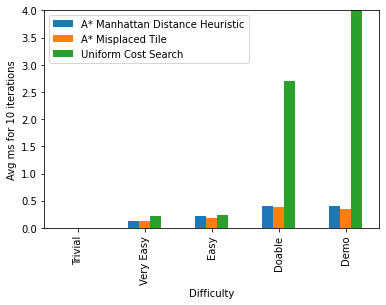

In [13]:
data = [["Trivial", 0.0066, 0.0067, 0.0065],
        ["Very Easy", 0.2126, 0.1207, 0.1296],
        ["Easy", 0.2465, 0.1874, 0.2133],
        ["Doable", 2.6997, 0.3834, 0.4052],
        ["Demo", 12.58, 0.3478, 0.4055]] 

# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Difficulty', 'Uniform Cost Search',
                                   'A* Misplaced Tile', 'A* Manhattan Distance Heuristic']) 

#ploting the result of the algorithms in bar chart
ax = df.plot(x="Difficulty", y=['A* Manhattan Distance Heuristic', "A* Misplaced Tile", "Uniform Cost Search"], kind="bar")
ax.set_ylabel("Avg ms for 10 iterations")
plt.ylim(0, 4)

(0.0, 20000.0)

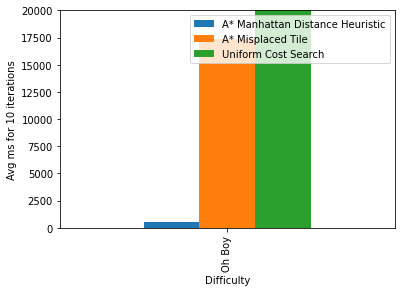

In [15]:


data2 = [["Oh Boy", 120520, 17367.92, 544.06]]
df3 = pd.DataFrame(data2, columns = ['Difficulty', 'Uniform Cost Search', 'A* Misplaced Tile', 'A* Manhattan Distance Heuristic']) 
    

ax = df3.plot(x="Difficulty", y=['A* Manhattan Distance Heuristic', "A* Misplaced Tile", "Uniform Cost Search"], kind="bar")
ax.set_ylabel("Avg ms for 10 iterations")
plt.ylim(0, 20000)



Text(0, 0.5, 'Expanded Nodes')

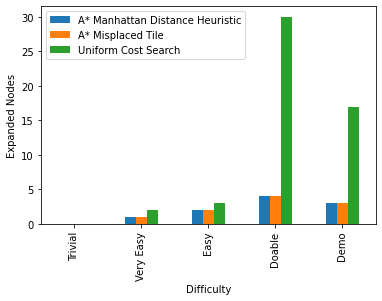

In [16]:


data = [["Trivial", 0, 0, 0],
        ["Very Easy", 2, 1, 1],
        ["Easy", 3, 2, 2],
        ["Doable", 30, 4, 4],
        ["Demo", 17, 3, 3]] 
df2 = pd.DataFrame(data, columns = ['Difficulty', 'Uniform Cost Search',
                                   'A* Misplaced Tile', 'A* Manhattan Distance Heuristic']) 
  

ax = df2.plot(x="Difficulty", y=['A* Manhattan Distance Heuristic', "A* Misplaced Tile",
                           "Uniform Cost Search"], kind="bar")
ax.set_ylabel("Expanded Nodes")



(0.0, 10000.0)

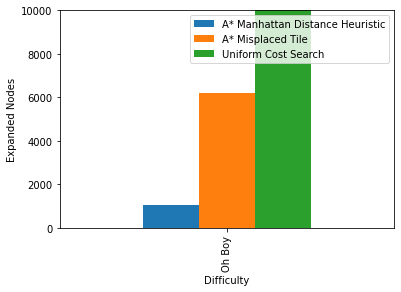

In [17]:
data = [["Oh Boy", 24050, 6216, 1034]]

df2 = pd.DataFrame(data, columns = ['Difficulty', 'Uniform Cost Search',
                                   'A* Misplaced Tile', 'A* Manhattan Distance Heuristic']) 
  

ax = df2.plot(x="Difficulty", y=['A* Manhattan Distance Heuristic', "A* Misplaced Tile",
                           "Uniform Cost Search"], kind="bar")
ax.set_ylabel("Expanded Nodes")
plt.ylim(0, 10000)

Text(0, 0.5, 'Max Nodes in Queue')

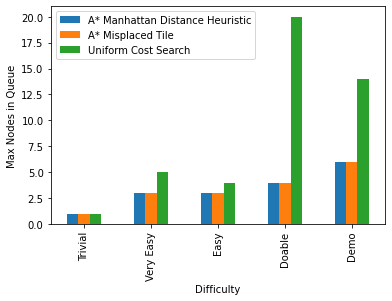

In [18]:
data = [["Trivial", 1, 1, 1],
        ["Very Easy", 5, 3, 3],
        ["Easy", 4, 3, 3],
        ["Doable", 20, 4, 4],
        ["Demo", 14, 6, 6]]

df2 = pd.DataFrame(data, columns = ['Difficulty', 'Uniform Cost Search',
                                   'A* Misplaced Tile', 'A* Manhattan Distance Heuristic']) 
  

ax = df2.plot(x="Difficulty", y=['A* Manhattan Distance Heuristic', "A* Misplaced Tile",
                           "Uniform Cost Search"], kind="bar")
ax.set_ylabel("Max Nodes in Queue")

(0.0, 10000.0)

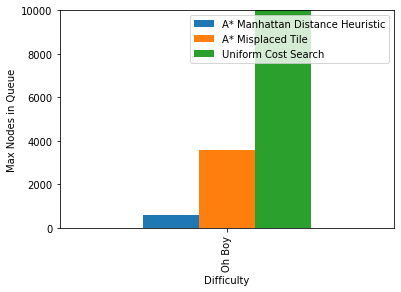

In [19]:
data = [[ "Oh Boy", 15780, 3593, 587]]

df2 = pd.DataFrame(data, columns = ['Difficulty', 'Uniform Cost Search',
                                   'A* Misplaced Tile', 'A* Manhattan Distance Heuristic']) 
  

ax = df2.plot(x="Difficulty", y=['A* Manhattan Distance Heuristic', "A* Misplaced Tile",
                           "Uniform Cost Search"], kind="bar")
ax.set_ylabel("Max Nodes in Queue")
plt.ylim(0, 10000)